In [2]:
import torch
import numpy as np

import mdtraj as md
import nglview as nv

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from tqdm import tqdm

n_particles = 22
n_dimensions = 3
dim = n_particles * n_dimensions

file_name = "0522_174800"
state = "c5"
scaling = 1


# Visualize samples

In [7]:
latent = torch.load(f"../res/{file_name}/result/latent-{state}.pt")
samples = torch.load(f"../res/{file_name}/result/samples-{state}.pt")
dlogp = torch.load(f"../res/{file_name}/result/dlogp-{state}.pt")
ad2_topology = md.load("../data/AD2/c5.pdb").topology
samples.shape

torch.Size([25, 66])

In [8]:
samples_view = samples / scaling
traj = md.Trajectory(
	xyz=samples_view.cpu().detach().numpy().reshape(-1, n_particles, n_dimensions),
	topology=ad2_topology
)

In [9]:
view = nv.show_mdtraj(traj)
view

NGLWidget(max_frame=24)

In [14]:
phis = md.compute_phi(traj)[1].flatten()
psis = md.compute_psi(traj)[1].flatten()
print(phis)
print(psis)

[ 0.88396364  1.9937592  -2.0292437  -1.5883843  -0.27743158 -1.8722835
 -1.0496079  -1.4141175  -1.9546298  -2.5100245   2.5321102   0.39496174
  1.5656253   2.0258374   2.261167   -2.6461601  -0.9829268   1.6026918
  2.6743467   1.8319689   1.6885715  -0.7474046  -0.24777001 -1.1243173
  2.0706139 ]
[ 0.8278578  -3.0389562   2.7979233   2.8409562   0.17530136  1.3063549
  0.3722876   2.4593     -2.6715555   2.2940595  -2.0531178  -2.957246
 -1.596996   -2.4419909  -2.7879355   2.5011427  -0.882451   -0.95777977
 -2.8637621  -1.0252899  -1.9555568   2.0199058  -0.72088075  0.67786825
  3.1131568 ]


>> Plotting Ramachandran plot


<Figure size 640x480 with 0 Axes>

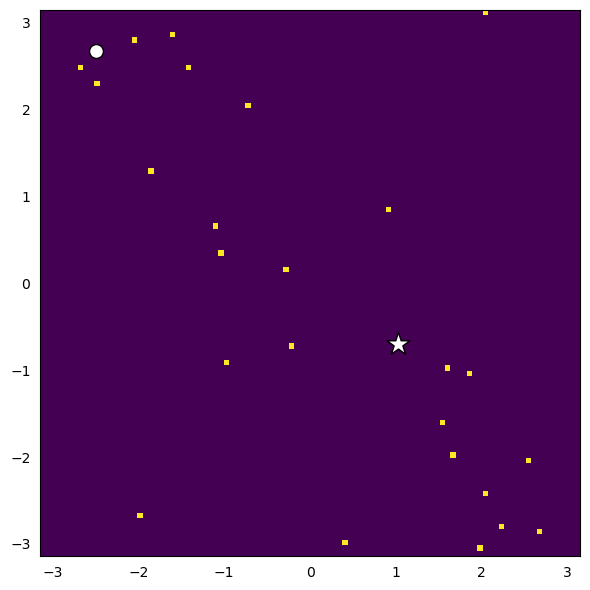

In [18]:
print(">> Plotting Ramachandran plot")
plot_range = [-np.pi, np.pi]
plt.clf()
fig, ax = plt.subplots(figsize=(6, 6))
h, x_bins, y_bins, im = ax.hist2d(
    phis, psis, 100,
    # norm=LogNorm(),
    range=[plot_range,plot_range],
    # rasterized=True
)
ax.scatter(-2.49, 2.67, edgecolors="black", c="w", zorder=101, s=100)
ax.scatter(1.02, -0.70, edgecolors="black", c="w", zorder=101, s=300, marker="*")
ax.margins(0) 
ax.tick_params(
    left = False,
    right = False ,
    labelleft = True , 
    labelbottom = True,
    bottom = False
) 

fig.tight_layout()
